# Week 7 - Visualization & Wrangling
---

Mentoring Session - Job Preparation Program - Pacmann AI

In [ ]:
# Please load this library
import numpy as np
import pandas as pd
from datetime import date,datetime

import seaborn as sns
import matplotlib.pyplot as plt

# Task Descriptions
---

- You are given a dataset of Online Store Retail Orders .
- The dataset contains 2 tables: `orders` and `product supplier`. You can join the tables on `Product ID`
- Your task is answer business questions below.
- But the data is not clean. Please **clean the data** by :
  1. Removing the unconsistency in `Customer Status`
  2. Dropping data with missing value (if any)
  3. Drop duplicates data (if any)

- Then, please **answer these business questions and give recommendations (you can also give some insights if you find something interesting)**:
  1. Which product has the highest profit percentage? The profit percentage can be calculated as:
  $$
  \text{Profit Percentage} = \cfrac
  {(\text{Unit Price - Cost Price per Unit})}
  {\text{Cost Price per Unit}} \cdot 100\%
  $$
  
  e.g. `unit price = 2.500`, `cost per unit price = 2.000`, <br>then `profit percentage = ((2.500 - 2.000)/2.000) * 100% = 500/2.000 * 100% = 25%`

  2. How much profit obtained month over month of every year?
  3. Does the lower the cost, the higher the profit? Does the cheaper the price the more people buy?
  4. Show the top 3 of the most favorite product in the latest year
  5. Find the tendency and the longest of order-to-delivery length for every month in the latest year (please use a proper measure of central tendency). Order-to-delivery length is defined as how much days was taken to deliver from order date of customer.
  6. The owner of store want to give discount promo. But, the promo is only for the active loyal customer. Help the owner find the unique `customer ID` of loyal customers and show the proportion of their status. Definition of active loyal customer is the customer who order more than 3 times and order in 3 latest months.
- **Hint**: data of customer status may be updated and different for every single order. You can use the maximum status level of the customer for question 6 (1: Silver, 2: Gold, 3: Platinum).
- **Note**: the month or year of order is defined from `Date Order`.

**Dataset**
- Please download the dataset in [here](https://drive.google.com/drive/folders/13QqqYUj8P06dXOUrtiea7K4MDendVNU5?usp=sharing)
- The actual data source is [here](https://www.kaggle.com/datasets/gabrielsantello/wholesale-and-retail-orders-dataset)

# Expected Output

The output should be:

**Question 1**
<center>
<img src="https://drive.google.com/uc?id=1QIJ3wZec4pcpnvumvcWSeErAMOp00PxZ">
</center>

```
Insert your interpretation of visualization
```
<br>


**Question 2**
<center>
<img src="https://drive.google.com/uc?id=1Qoa15HEA04W5KKJ5KcrlhIJ0J8kHs8g5">
</center>

```
Insert your interpretation of visualization
```
<br>


**Question 3**
<center>
<img src="https://drive.google.com/uc?id=1Q0HiVZlbOcAV5opDUkGVEZpKizoHzFme">
</center>

```
Insert your interpretation of visualization
```
<br>



**Question 4**

<center>
<img src="https://drive.google.com/uc?id=1AIWF6xRibdRZeProyHPeHN9sgNjOzGgz">
</center>

```
Insert your interpretation of visualization
```
<br>



**Question 5**

The order-to-delivery length of every month in the latest year:
<center>
<img src="https://drive.google.com/uc?id=1mIS80ZqqhV52VfMZzc64heWUljFoI5yb">
</center>

```
Insert your insights
```

<br>

**Question 6**
```
Total active loyal customers: 103
```

Customer ID of active loyal customer:
<center>
<img src="https://drive.google.com/uc?id=1iB9NUV7xIB_LIO7Y9POnE6GbDFmcaVw0">
</center>
<br>

Proportion of active loyal customer status:
<center>
<img src="https://drive.google.com/uc?id=1VmF25ko4werBb4dZAI1w_VTdgRQcczLs">
</center>

```
Insert your interpretation of visualization
```

# Answer
---


- Provide the code for getting the expected output

In [1]:
# Write your code in here
# Provide your code with sufficient comment on the wrangling processes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Load Dataset

<h4>Data Orders<h4>

In [2]:
order = pd.read_csv("orders.csv")
order.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        185013 non-null  int64  
 1   Customer Status                    185013 non-null  object 
 2   Date Order was placed              185013 non-null  object 
 3   Delivery Date                      185013 non-null  object 
 4   Order ID                           185013 non-null  int64  
 5   Product ID                         185013 non-null  int64  
 6   Quantity Ordered                   185013 non-null  int64  
 7   Total Retail Price for This Order  185013 non-null  float64
 8   Cost Price Per Unit                185013 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.7+ MB


In [ ]:
order.shape

(185013, 9)

In [3]:
p_supplier = pd.read_csv("product_supplier.csv")
p_supplier.head()

,Product ID,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,210100100001,Children,Children Outdoors,"Outdoor things, Kids",Boy's and Girl's Ski Pants with Braces,NO,Scandinavian Clothing A/S,50
1,210100100002,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket,ES,Luna sastreria S.A.,4742
2,210100100003,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket Sidney,NO,Scandinavian Clothing A/S,50
3,210100100004,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Set,NO,Scandinavian Clothing A/S,50
4,210100100005,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Suit,NO,Scandinavian Clothing A/S,50


In [ ]:
p_supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product ID        5504 non-null   int64 
 1   Product Line      5504 non-null   object
 2   Product Category  5504 non-null   object
 3   Product Group     5504 non-null   object
 4   Product Name      5504 non-null   object
 5   Supplier Country  5504 non-null   object
 6   Supplier Name     5504 non-null   object
 7   Supplier ID       5504 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 344.1+ KB


In [ ]:
p_supplier.shape

(5504, 8)

##Clean Data

1. Remove Unconsistency in Customers Status

In [ ]:
order['Customer Status'].unique()

array(['Silver', 'SILVER', 'Gold', 'GOLD', 'PLATINUM', 'Platinum'],
      dtype=object)

In [ ]:
order['Customer Status'].value_counts()

,count
Customer Status,
Silver,74123
Gold,70565
SILVER,18418
GOLD,17713
Platinum,3323
PLATINUM,871


In [4]:
def r_unconsistency_customer_status():
  data = {
      "SILVER" : "Silver",
      "GOLD"   : "Gold",
      "PLATINUM" : "Platinum"
  }

  return data

In [5]:
order['Customer Status'] = order['Customer Status'].replace(r_unconsistency_customer_status())

In [6]:
order["Customer Status"].value_counts()

,count
Customer Status,
Silver,92541
Gold,88278
Platinum,4194


2. Droping Missing Value (If Any)

In [ ]:
order.isna().sum()

,0
Customer ID,0
Customer Status,0
Date Order was placed,0
Delivery Date,0
Order ID,0
Product ID,0
Quantity Ordered,0
Total Retail Price for This Order,0
Cost Price Per Unit,0


In [ ]:
p_supplier.isna().sum()

,0
Product ID,0
Product Line,0
Product Category,0
Product Group,0
Product Name,0
Supplier Country,0
Supplier Name,0
Supplier ID,0


Based on That no Missing Value so this step is just go next

## Drop Duplicated data (If Any)

In [ ]:
print(f"The number of duplicated data Order is :",len(order[order.duplicated(keep=False)]))

The number of duplicated data Order is : 0


In [ ]:
print(f"The number of duplicated data Supplier is :",len(p_supplier[p_supplier.duplicated(keep=False)]))

The number of duplicated data Supplier is : 0


### Merged Dataset

In [7]:
df = order.merge(p_supplier,on='Product ID',how='left')
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,7574,Silver,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80,Outdoors,Outdoors,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd,316
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,Clothes,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc,1303
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,Shoes,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        185013 non-null  int64  
 1   Customer Status                    185013 non-null  object 
 2   Date Order was placed              185013 non-null  object 
 3   Delivery Date                      185013 non-null  object 
 4   Order ID                           185013 non-null  int64  
 5   Product ID                         185013 non-null  int64  
 6   Quantity Ordered                   185013 non-null  int64  
 7   Total Retail Price for This Order  185013 non-null  float64
 8   Cost Price Per Unit                185013 non-null  float64
 9   Product Line                       185013 non-null  object 
 10  Product Category                   185013 non-null  object 
 11  Product Group                      1850

##QUESTION

### 1. Product has the highest profit percentage

In [8]:
# Add Unit Price
df['Unit Price'] = df['Total Retail Price for This Order']/df["Quantity Ordered"]
df.head(2)

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID,Unit Price
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963,46.3
1,7574,Silver,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963,21.7


  $$
  \text{Profit Percentage} = \cfrac
  {(\text{Unit Price - Cost Price per Unit})}
  {\text{Cost Price per Unit}} \cdot 100\%
  $$

In [9]:
# Function to calculate Profit Percentage
def profit_percentage(unit_price,cost_price_per_unit):
  profit_p = ((unit_price - cost_price_per_unit)/cost_price_per_unit)*100
  return profit_p

In [10]:
df['Profit Percentage'] = df.apply(lambda row : profit_percentage(row["Unit Price"],row['Cost Price Per Unit']), axis=1)
df.head(2)

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID,Unit Price,Profit Percentage
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963,46.3,123.671498
1,7574,Silver,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963,21.7,118.090452


In [11]:
profit_percentage_mean = df[['Product Category','Profit Percentage']].groupby(["Product Category"]).mean()
profit_percentage_vis  = profit_percentage_mean.sort_values(by='Profit Percentage',ascending=False)
profit_percentage_vis

,Profit Percentage
Product Category,
Golf,186.191632
Racket Sports,147.656054
Swim Sports,145.335768
Winter Sports,129.279647
Team Sports,125.446325
Indoor Sports,125.034292
Running - Jogging,124.934179
Children Sports,122.135166
Assorted Sports Articles,121.617614


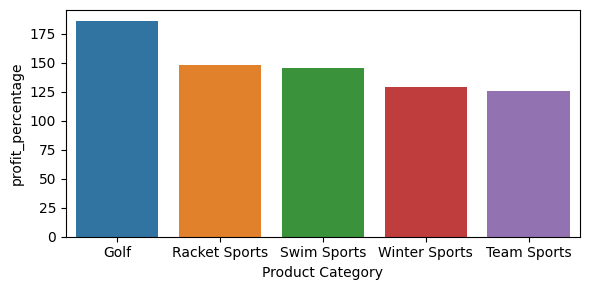

In [12]:
# Create a bar plot
plt.figure(figsize=(6, 3))

# Define a custom list of colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


sns.barplot(x='Product Category', y='Profit Percentage',hue='Product Category', data=profit_percentage_vis.head(), palette=custom_colors, legend=False)

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('profit_percentage')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Elaboration:



1.   Based on barchar above we get information about the 5 higher profit benefit based on product category and product category **Golf** has give higher benefit of profit with value of percentage is **186.192**
2.   Rocket Sports has total percentage **145.33** and Swim Sports has **129.27**, in Winter Sports and Team Sport Product category have almost same values of percentage **125.44** for Winter Sports and **125.03** for Team Sports
3. Sport is the most 5 highest profit percentage based on the graphic


### 2. Profit obtained month over month of every year

In [27]:
df['Profit'] = df['Total Retail Price for This Order'] - df['Cost Price Per Unit']
df.head(2)

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,...,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID,Unit Price,Profit Percentage,Profit,Year,Month
0,579,Silver,2017-01-01,07-Jan-17,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,...,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963,46.3,123.671498,71.90,2017,1
1,7574,Silver,2017-01-01,05-Jan-17,123004074,210201000009,1,21.7,9.95,Children,...,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963,21.7,118.090452,11.75,2017,1


In [28]:
# Assuming df is your DataFrame
df['Date Order was placed'] = pd.to_datetime(df['Date Order was placed'], format='%d-%b-%y')

# Create new columns for year and month
df['Year'] = df['Date Order was placed'].dt.year
df['Month'] = df['Date Order was placed'].dt.month

# Group by Year and Month, then sum the profit
monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
monthly_profit.head(2)

,Year,Month,Profit
0,2017,1,193749.225
1,2017,2,162690.635


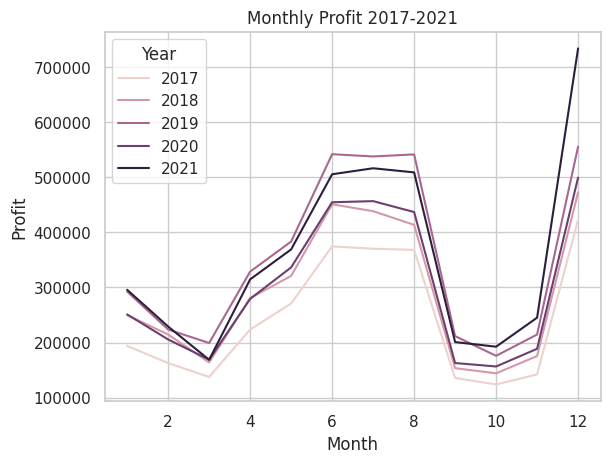

In [29]:
fig,ax =plt.subplots()
sns.lineplot(data=monthly_profit,x="Month", y="Profit",hue="Year")
plt.title("Monthly Profit 2017-2021")
plt.legend(title="Year")

Elaboration:

1.   That Line chart show the profit of every month in 2017 to 2021, based of the graph show every years is has almost same trend, in March to June Profit is increase in every year, and June to August having changes,but that are not too significant, either up or down, tends to be more stable, but in August to September the profit is decrease significan to **<= 200000** for every year, and increase again in end year specificly in November to December for 2012 - 2021
2. In month January to March, Agustus - September is month that the profit is decrese, March - June, November - December is montly with Profit is Incrase and in June to August, Sepetember - November is fluktuatif change but tends to be more stable


### 3. Does the lower the cost, the higher the profit? Does the cheaper the price the more people buy?

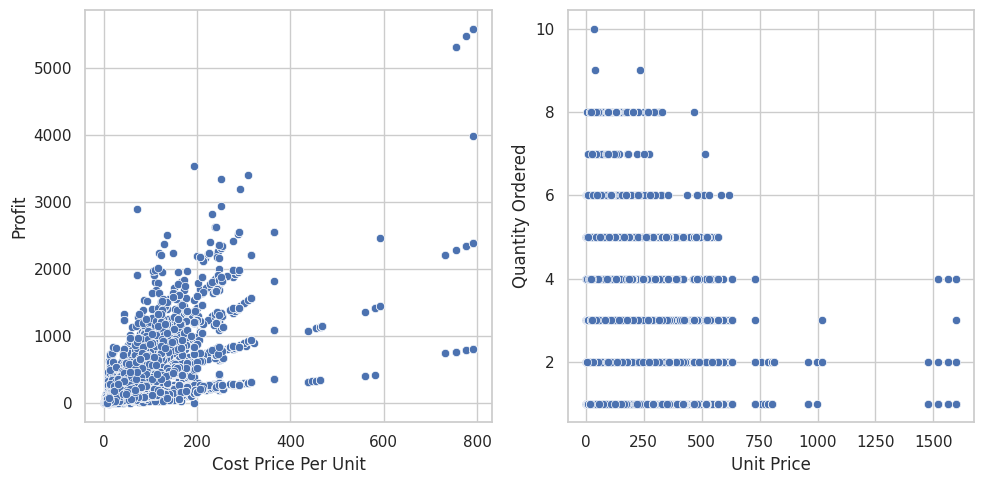

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='Cost Price Per Unit', y='Profit', data=df, ax=axs[0])
axs[0].set_xlabel('Cost Price Per Unit', fontsize=12)
axs[0].set_ylabel('Profit')

sns.scatterplot(x='Unit Price', y='Quantity Ordered', data=df, ax=axs[1])
axs[1].set_xlabel('Unit Price')
axs[1].set_ylabel('Quantity Ordered')

# Tight layout for better spacing between plots
plt.tight_layout()
plt.show()

Elaboration:

1. Based on that we can say that lower not necessarily will get high profit, the scatter plot shows that higher-cost items can still have higher profits, it suggests that while low costs help, profitability also depends on the selling price and the margin.
2. Cheaper Price is More Sales (Likely, but not always): higher quantities ordered for lower prices, it suggests that customers prefer buying cheaper items in larger amounts. However, some premium products might also sell well even at higher prices if demand exists.

### 4. Top 3 of the most favorite product in the latest year

In [63]:
# Extract the year of the latest date in the DataFrame
latest_year = df['Date Order was placed'].dt.year.max()
df_last_year = df.loc[df['Date Order was placed'].dt.year == latest_year,['Product Category','Quantity Ordered']]
df_last_year.head(2)

,Product Category,Quantity Ordered
142448,Shoes,2
142449,Clothes,1


In [62]:
# Calculate total the number of Product Group that has most frequently bought by customer
top_three_favorite = df_last_year.groupby(['Product Category'])['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered',ascending=False).head(3)
top_three_favorite

,Product Category,Quantity Ordered
2,Clothes,14021
0,Assorted Sports Articles,10806
5,Outdoors,10704


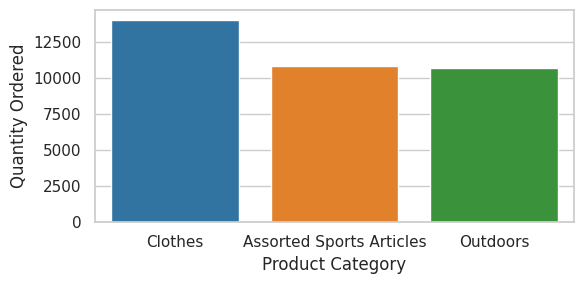

In [67]:
# Create a bar plot
plt.figure(figsize=(6, 3))

# Define a custom list of colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']


sns.barplot(x='Product Category', y='Quantity Ordered',hue='Product Category', data=top_three_favorite, palette=custom_colors, legend=False)

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Elaboration:



1.   Category Product Clothes is the favorite product by customer order in 2021 (lastest year), with **14021** clothes category is sold followed by Assorted Sport Articles (**10806**), and Outdoors (**10704**) in position two and three.
2.   The difference between Quantity order Clothes and Assorted Sports Articles is Slightly big, the difference is **3215** and Assorted Sports Articles  with Outdoors is **102**



### 5. The order-to-delivery length of every month in the latest year

In [69]:
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,...,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID,Unit Price,Profit Percentage,Profit,Year,Month
0,579,Silver,2017-01-01,07-Jan-17,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,...,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963,46.3,123.671498,71.90,2017,1
1,7574,Silver,2017-01-01,05-Jan-17,123004074,210201000009,1,21.7,9.95,Children,...,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963,21.7,118.090452,11.75,2017,1
2,28861,Gold,2017-01-01,04-Jan-17,123000871,230100500068,1,1.7,0.80,Outdoors,...,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd,316,1.7,112.500000,0.90,2017,1
3,43796,Gold,2017-01-01,06-Jan-17,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,...,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc,1303,47.9,99.168399,23.85,2017,1
4,54673,Gold,2017-01-01,04-Jan-17,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,...,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747,36.9,101.639344,18.60,2017,1


In [76]:
# Extract the year of the latest date in the DataFrame
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], format='%d-%b-%y')
latest_year = df['Date Order was placed'].dt.year.max()
df_last_year = df.loc[df['Date Order was placed'].dt.year == latest_year,['Year','Month','Date Order was placed','Delivery Date']]
df_last_year.head(2)

,Year,Month,Date Order was placed,Delivery Date
142448,2021,1,2021-01-01,2021-01-06
142449,2021,1,2021-01-01,2021-01-07


In [79]:
# Calculate the day
df_last_year['Days'] = (df['Delivery Date'] - df['Date Order was placed']).dt.days
df_last_year.head()

,Year,Month,Date Order was placed,Delivery Date,Days
142448,2021,1,2021-01-01,2021-01-06,5
142449,2021,1,2021-01-01,2021-01-07,6
142450,2021,1,2021-01-01,2021-01-02,1
142451,2021,1,2021-01-01,2021-01-05,4
142452,2021,1,2021-01-01,2021-01-03,2


In [81]:
# Calculate the median and maximum for each month
monthly_stats = df_last_year.groupby('Month')['Days'].agg(['median', 'max']).reset_index()

# Rename columns
monthly_stats.rename(columns={'median': 'order_to_delivery_length', 'max': 'max_delivery_length'}, inplace=True)

# Set 'Month' as the index
monthly_stats.set_index('Month', inplace=True)
monthly_stats

,order_to_delivery_length,max_delivery_length
Month,,
1,0.0,20
2,0.0,20
3,0.0,23
4,0.0,19
5,0.0,18
6,0.0,16
7,0.0,21
8,0.0,17
9,0.0,21


Elaboration:



1.   Based on result shown that 0 days indicates the central tendency for the median of packaging for each month to be 1 day of delivery.
2.   The maximum delivery time varies across months, with the shortest maximum delivery time being 16 days (June) and the longest being 25 days (December). in december is the longest day it may causes of in last year is has more user activity to order it can be shown in the graph profit number 2, so the order is must be queue in delivery



### 6. Give discount promo

In [209]:
# 1. Filter data for the last 3 months
last_month = df['Month'].max()
last_year = df['Year'].max()

# Map customer statuses to numerical levels for comparison
status_mapping = {'Silver': 1, 'Gold': 2, 'Platinum': 3}
df['Status Level'] = df['Customer Status'].map(status_mapping)

# Filter data for the last 3 months
filtered_df = df.loc[
    (df['Year'] == last_year) &
    (df['Month'] >= (last_month - 2)) &
    (df['Month'] <= last_month),
    ['Customer ID', 'Customer Status', 'Year', 'Month', 'Order ID', 'Status Level']
]

order_counts = filtered_df.groupby('Customer ID')['Order ID'].count().reset_index()

loyal_customers = order_counts[order_counts['Order ID'] > 3]['Customer ID']

max_status_loyal_customers = filtered_df[filtered_df['Customer ID'].isin(loyal_customers)].groupby('Customer ID')['Status Level'].max().reset_index()

max_status_loyal_customers['Max Status'] = max_status_loyal_customers['Status Level'].map({1: 'Silver', 2: 'Gold', 3: 'Platinum'})

max_status_loyal_customers[['Customer ID']]

,Customer ID
0,863
1,870
2,1244
3,1263
4,1342
...,...
98,88563
99,91511
100,92311
101,92969


In [213]:
status_proportions = pd.DataFrame(round(max_status_loyal_customers['Max Status'].value_counts(normalize=True)*100,2)).reset_index()
status_proportions

,Max Status,proportion
0,Gold,88.35
1,Platinum,9.71
2,Silver,1.94


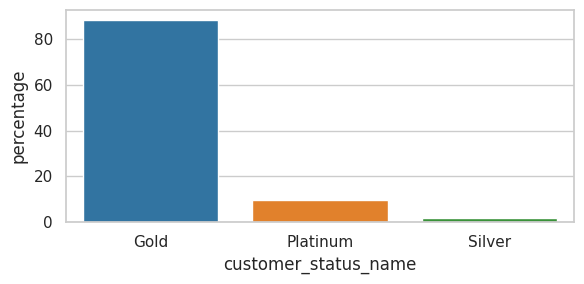

In [215]:
# Create a bar plot
plt.figure(figsize=(6, 3))

# Define a custom list of colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']


sns.barplot(x='Max Status', y='proportion',hue='Max Status', data=status_proportions, palette=custom_colors, legend=False)

# Set labels and title
plt.xlabel('customer_status_name')
plt.ylabel('percentage')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Elaboration:

1. The majority of active loyal customers hold the status of "Gold." This suggests that a significant portion of loyal customers has a higher status level, reflecting more valuable or frequent customers with percentage **88.35%**
2. A smaller proportion of active loyal customers hold the "Platinum" status. This indicates that while fewer customers achieve the highest status, they still make up a notable portion of the loyal customer base **9.71%**
3. The last is silver with the number of percentage **1.94%** with smaller percentage this shows that most loyal customers are either "Gold" or "Platinum," with "Silver" being relatively rare among this group

---END---